<a href="https://colab.research.google.com/github/sonjoy1s/kaggle_project/blob/main/Water_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier


In [265]:
df = pd.read_csv("/content/water_potability.csv")

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [267]:
df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [268]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [269]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [270]:
X = df.drop('Potability',axis=1)
y = df['Potability']

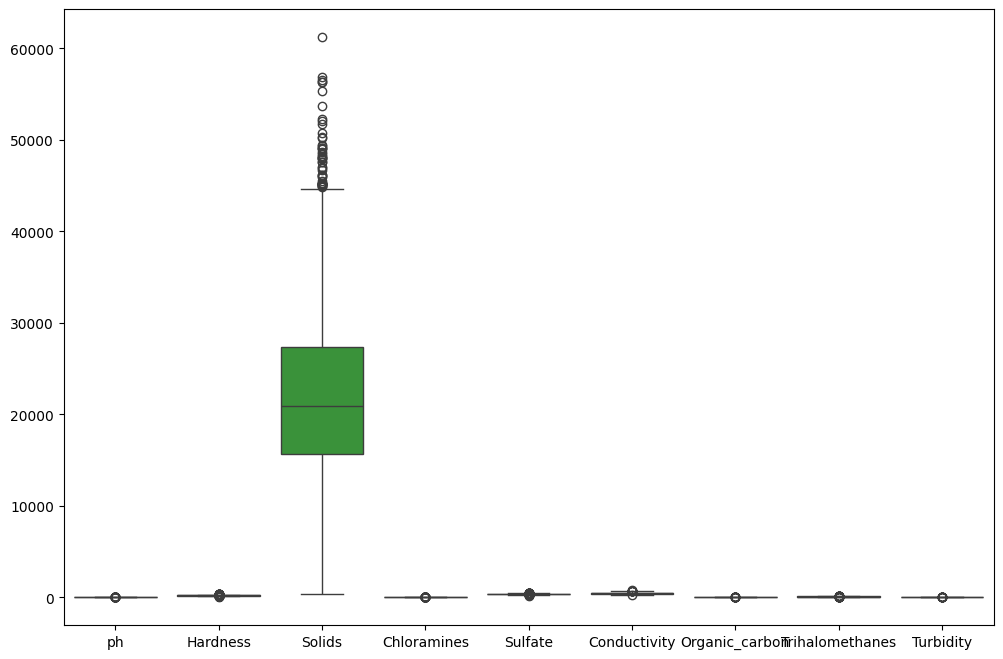

In [271]:
plt.figure(figsize=(12,8))
sns.boxplot(data=X)
plt.show()

In [272]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [273]:
df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [274]:
df['ph'].fillna(df['ph'].median(),inplace=True)
df['Sulfate'].fillna(df['Sulfate'].median(),inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].median(),inplace=True)


/tmp/ipython-input-1497076108.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ph'].fillna(df['ph'].median(),inplace=True)
/tmp/ipython-input-1497076108.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [275]:
df.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [276]:
numeric_features = X.select_dtypes(include = ['int64','float64']).columns
categorical_features = X.select_dtypes(include = ['object']).columns

In [277]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())  # NN / SVC only
])


In [278]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [279]:
# base learner
lgr = LogisticRegression(class_weight={0:1, 1:1998/1278}, max_iter=1000)
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf_clf = RandomForestClassifier(class_weight={0:1, 1:1998/1278},random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42)
svc_cls = SVC(random_state=42)



In [280]:
#voting regressor

voting_cls = VotingClassifier(
    estimators=[
        ('rf', rf_clf),#randomforest
        ('gb', gb_clf), # Gradientboosting
        ('xgb', xgb_clf), # Xgbclassifier

    ]
)

In [281]:
#stacking
stacking_cls = StackingClassifier(
    estimators=[
     ('lgr', lgr),
    ('rf', rf_clf),
    ('gb', gb_clf),
    ('xgb', xgb_clf)
])

In [282]:
model_train = {
    'Logistic Regression': lgr,
    'Decision Tree': dtc,
    'KNN': knn,
    'Random Forest': rf_clf,
    'Gradient Boosting': gb_clf,
    'XGBoost': xgb_clf,
    'SVC': svc_cls,
    'Voting Classifier': voting_cls,
    'Stacking Classifier': stacking_cls

}

In [283]:
results = []
for name, model in model_train.items():
  pipe = Pipeline(
      [
          ('numercal_pipe',num_pipeline),
          ('model',model)
      ]
  )

  pipe.fit(X_train,y_train)

  y_pred = pipe.predict(X_test)

  accuracy = accuracy_score(y_test,y_pred)
  cls_rep = classification_report(y_test,y_pred)
  cnf_mat = confusion_matrix(y_test,y_pred)
  results.append(
      {
          'Model Name': name,
          'Accuracy': accuracy,
          'Classification Report': cls_rep,
          'Confusion Matrix': cnf_mat
      }
  )

  result_df = pd.DataFrame(results).sort_values("Accuracy", ascending=False)
print(result_df)

            Model Name  Accuracy  \
7    Voting Classifier  0.679878   
3        Random Forest  0.678354   
6                  SVC  0.669207   
8  Stacking Classifier  0.669207   
4    Gradient Boosting  0.652439   
5              XGBoost  0.646341   
2                  KNN  0.612805   
1        Decision Tree  0.589939   
0  Logistic Regression  0.524390   

                               Classification Report          Confusion Matrix  
7                precision    recall  f1-score   ...    [[365, 35], [175, 81]]  
3                precision    recall  f1-score   ...    [[369, 31], [180, 76]]  
6                precision    recall  f1-score   ...    [[366, 34], [183, 73]]  
8                precision    recall  f1-score   ...    [[358, 42], [175, 81]]  
4                precision    recall  f1-score   ...    [[365, 35], [193, 63]]  
5                precision    recall  f1-score   ...   [[322, 78], [154, 102]]  
2                precision    recall  f1-score   ...    [[319, 81], [173

Final Accuracy: 0.6798780487804879


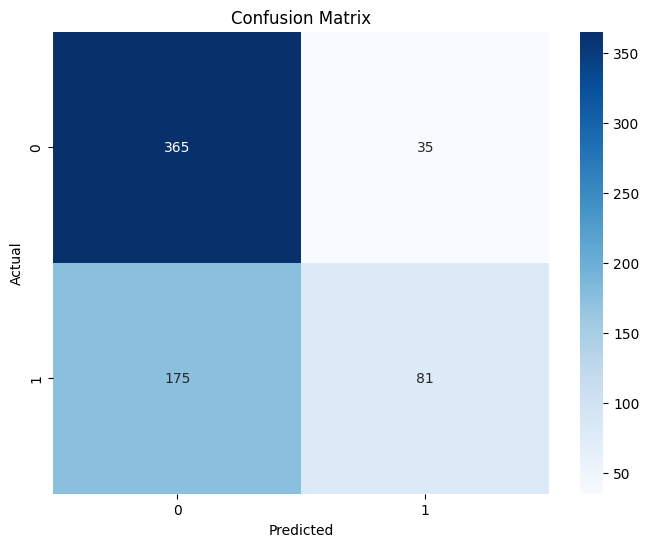

In [284]:
best_model = result_df.iloc[0]['Model Name']
best_model_obj = model_train[best_model]

final_pipe = Pipeline(
    [
        ('preprocessor',num_pipeline),
        ('model',best_model_obj)
    ]
)

final_pipe.fit(X_train,y_train)
y_final_pred = final_pipe.predict(X_test)
print("Final Accuracy:", accuracy_score(y_test, y_final_pred))

cm = confusion_matrix(y_test, y_final_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [285]:
# cross validation
from sklearn.model_selection import cross_val_score
svc_pipe = Pipeline(
    [
        ('numercal_pipe',num_pipeline),
        ('model',SVC(class_weight='balanced',probability=True))
    ]
)

In [286]:
svc_pipe.fit(X_train,y_train)

Pipeline(steps=[('numercal_pipe',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', RobustScaler())])),
                ('model', SVC(class_weight='balanced', probability=True))])

In [287]:
y_svc_pred = svc_pipe.predict(X_test)

In [288]:
acc = accuracy_score(y_test,y_svc_pred)
print(acc)
rep_cls = classification_report(y_test,y_svc_pred)
print(rep_cls)

0.6189024390243902
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       400
           1       0.51      0.49      0.50       256

    accuracy                           0.62       656
   macro avg       0.60      0.60      0.60       656
weighted avg       0.62      0.62      0.62       656



In [289]:
cross_val = cross_val_score(svc_pipe,X_train,y_train,cv=5,scoring='accuracy')
print(cross_val)

[0.65267176 0.64885496 0.70038168 0.67366412 0.63167939]


In [290]:
print(np.mean(cross_val))

0.6614503816793893


In [291]:
print(np.std(cross_val))

0.0236086520522017


In [292]:
vtn_pipe = Pipeline(
    [
        ('numercal_pipe',num_pipeline),
        ('model',voting_cls)
    ]
)

In [250]:
cross_val_vtn = cross_val_score(vtn_pipe,X_train,y_train,cv=5,scoring='accuracy')
print(cross_val_vtn)

[0.66412214 0.67366412 0.65076336 0.66221374 0.63931298]


In [251]:
print(cross_val_vtn.mean())

0.6580152671755725


In [252]:
print(cross_val_vtn.std())

0.011850515035313003


In [253]:
param_grid = {
              'model__C': [0.01,0.1,1,10,100],
              'model__max_iter': [1000,5000]
              }

In [296]:
rnd = RandomForestClassifier(class_weight={0:1, 1:1998/1278},random_state=42)
rnd.fit(X_train,y_train)
y_rnd_pred = rnd.predict(X_test)
print("Random :",accuracy_score(y_test,y_rnd_pred))
print(classification_report(y_test,y_rnd_pred))

Random : 0.6646341463414634
              precision    recall  f1-score   support

           0       0.67      0.91      0.77       400
           1       0.66      0.29      0.40       256

    accuracy                           0.66       656
   macro avg       0.66      0.60      0.58       656
weighted avg       0.66      0.66      0.62       656



In [254]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    estimator=svc_pipe,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [255]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('numercal_pipe',
                                        Pipeline(steps=[('imputer',
                                                         SimpleImputer(strategy='median')),
                                                        ('scaler',
                                                         RobustScaler())])),
                                       ('model',
                                        SVC(class_weight='balanced',
                                            probability=True))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100],
                         'model__max_iter': [1000, 5000]},
             scoring='accuracy', verbose=1)

In [256]:
print("Best Parameters Found:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Best Parameters Found: {'model__C': 1, 'model__max_iter': 5000}
Best CV Accuracy: 0.6614503816793893


In [257]:
best_lr_model = grid_search.best_estimator_

In [258]:
y_pred = best_lr_model.predict(X_test)
print("Final Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Final Test Accuracy: 0.6189024390243902
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69       400
           1       0.51      0.49      0.50       256

    accuracy                           0.62       656
   macro avg       0.60      0.60      0.60       656
weighted avg       0.62      0.62      0.62       656



In [259]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(64,32),
    activation='relu',
    solver='adam',
    alpha=0.01,
    learning_rate_init=0.001,
    max_iter=1000,
    random_state=42
)

mlp_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('model', mlp)
])


mlp_pipe.fit(X_train, y_train)
y_pred = mlp_pipe.predict(X_test)

print(" MLPClassifier_Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


 MLPClassifier_Accuracy: 0.5914634146341463
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       400
           1       0.48      0.50      0.49       256

    accuracy                           0.59       656
   macro avg       0.57      0.57      0.57       656
weighted avg       0.59      0.59      0.59       656



In [260]:
# Install CatBoost
!pip install catboost

from catboost import CatBoostClassifier

cat = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    loss_function='Logloss',
    class_weights=[1,2],
    verbose=0
)

cat_pipe = Pipeline([
    ('num_pipe', num_pipeline),
    ('model', cat)
])

cat_pipe.fit(X_train, y_train)
y_pred_cat = cat_pipe.predict(X_test)

print(accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

0.6173780487804879
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       400
           1       0.51      0.55      0.53       256

    accuracy                           0.62       656
   macro avg       0.60      0.61      0.60       656
weighted avg       0.62      0.62      0.62       656



In [261]:
print("Catboot", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

Catboot 0.6173780487804879
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       400
           1       0.51      0.55      0.53       256

    accuracy                           0.62       656
   macro avg       0.60      0.61      0.60       656
weighted avg       0.62      0.62      0.62       656



In [262]:
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

cat = CatBoostClassifier(
    iterations=800,
    depth=8,
    learning_rate=0.03,
    loss_function='Logloss',
    eval_metric='F1',
    class_weights=[1, 1.8],
    random_state=42,
    verbose=0
)

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('model', cat)
])

cat_pipe.fit(X_train, y_train)
y_pred = cat_pipe.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.6432926829268293
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       400
           1       0.55      0.46      0.50       256

    accuracy                           0.64       656
   macro avg       0.62      0.61      0.61       656
weighted avg       0.63      0.64      0.64       656



In [295]:
# Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Load data
df = pd.read_csv("/content/water_potability.csv")

# Fill missing values for selected columns
for col in ['ph', 'Sulfate', 'Trihalomethanes']:
    df[col] = df[col].fillna(df[col].median())

# Features & target
X = df.drop('Potability', axis=1)
y = df['Potability']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Numeric pipeline
# This num_pipeline will be unrolled and its steps used directly in ImbPipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())  # scaling for SVC / NN
])

# Apply SMOTE to handle imbalance
smote = SMOTE(random_state=42)

# Base models with class_weight
rf_clf = RandomForestClassifier(class_weight={0:1, 1:1.56}, random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42, eval_metric='logloss')
svc_cls = SVC(class_weight={0:1, 1:1.56}, probability=True, random_state=42)

# Voting Classifier
voting_cls = VotingClassifier(
    estimators=[('rf', rf_clf), ('gb', gb_clf), ('xgb', xgb_clf)],
    voting='soft'
)

# Stacking Classifier
stacking_cls = StackingClassifier(
    estimators=[('rf', rf_clf), ('gb', gb_clf), ('xgb', xgb_clf)],
    final_estimator=LogisticRegression(class_weight={0:1, 1:1.56}, max_iter=1000)
)

# Model dictionary
model_train = {
    'Random Forest': rf_clf,
    'Gradient Boosting': gb_clf,
    'XGBoost': xgb_clf,
    'SVC': svc_cls,
    'Voting Classifier': voting_cls,
    'Stacking Classifier': stacking_cls
}

# Train and evaluate
results = []

for name, model in model_train.items():
    # Build pipeline with SMOTE + numeric pipeline steps integrated directly
    pipe = ImbPipeline([
        ('smote', smote),
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler()),
        ('model', model)
    ])

    # Fit model
    pipe.fit(X_train, y_train)

    # Predict probabilities & apply threshold
    if hasattr(pipe.named_steps['model'], 'predict_proba'):
        y_prob = pipe.predict_proba(X_test)[:,1]
        threshold = 0.4  # tuned threshold for minority class
        y_pred = (y_prob >= threshold).astype(int)
    else:
        y_pred = pipe.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall1 = recall_score(y_test, y_pred)
    cls_report = classification_report(y_test, y_pred)
    cnf_mat = confusion_matrix(y_test, y_pred)

    results.append({
        'Model Name': name,
        'Accuracy': acc,
        'F1 (Class1)': f1,
        'Recall (Class1)': recall1,
        'Classification Report': cls_report,
        'Confusion Matrix': cnf_mat
    })

# Create results dataframe
result_df = pd.DataFrame(results).sort_values('F1 (Class1)', ascending=False)
print(result_df[['Model Name', 'Accuracy', 'F1 (Class1)', 'Recall (Class1)']])

            Model Name  Accuracy  F1 (Class1)  Recall (Class1)
5  Stacking Classifier  0.556402     0.577649         0.777344
0        Random Forest  0.570122     0.571429         0.734375
1    Gradient Boosting  0.515244     0.565574         0.808594
3                  SVC  0.565549     0.564885         0.722656
4    Voting Classifier  0.583841     0.558966         0.675781
2              XGBoost  0.589939     0.525573         0.582031
